In [1]:
%pip install siphon -q


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import requests
import xarray as xr
import numpy as np
import pandas as pd
import rioxarray as rxr
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs

from bs4 import BeautifulSoup
from odc.geo.xr import assign_crs
from odc.geo.geom import Geometry, BoundingBox
from siphon.catalog import TDSCatalog

import sys

sys.path.insert(1, "home/jovyan/dev/Tools/")
from dea_tools.plotting import rgb
from dea_tools.dask import create_local_dask_cluster


In [ ]:
input_dir = "/home/jovyan/gdata1/projects/fc-sub-annual/results/tiles/"
vector_path = (
    "/home/jovyan/gdata1/projects/fc-sub-annual/australia_100km_buffer.geojson"
)

catalog = (
    "https://thredds.nci.org.au/thredds/catalog/tc43/modis-fc/v310/tiles/monthly/cover/"
)
data_link = (
    "https://thredds.nci.org.au/thredds/dodsC/tc43/modis-fc/v310/tiles/monthly/cover/"
)


In [ ]:
cat = TDSCatalog(catalog)


In [ ]:
cat.catalog_refs


[]

In [ ]:
ds = cat.datasets
ds = ds[0]

ds


FC_Monthly_Medoid.v310.MCD43A4.h00v08.2001.006.nc

In [ ]:
# load ara of interest
gdf = gpd.read_file(vector_path)
gdf = gdf.to_crs("EPSG:4326")  # match the CSIRO MODIS projection

# define a bounding box from the geometry
bb = gdf.total_bounds


In [ ]:
# soup = BeautifulSoup(requests.get(catalog).content, "html.parser")


In [ ]:
# # extract the href links and get all the links for the dataset
# file_names = []

# for link in soup.select('a[href*=".html"]'):
#     href = link["href"]
#     if "dataset" in href:  # only add file names to list
#         file_names.append(href)


# list_of_links = [
#     catalog + f.replace("catalog.html?dataset=tc43-modis-fc/", "") for f in file_names
# ]


In [ ]:
# list_of_links


In [ ]:
# # open with xarray and tidy up

# modis_ds = xr.open_mfdataset(list_of_links)
# # modis_ds = modis_ds.assign_crs(mosid_ds, crs='EPSG3577')


In [ ]:
# modis_ds


In [ ]:
test_modis = xr.open_dataset(
    "https://thredds.nci.org.au/thredds/dodsC/tc43/modis-fc/v310/tiles/monthly/cover/FC_Monthly_Medoid.v310.MCD43A4.h10v04.2006.006.nc"
)

test_modis = assign_crs(test_modis, crs=test_modis.sinusoidal.spatial_ref)


In [ ]:
test_da = test_modis.phot_veg.isel(time=-1)


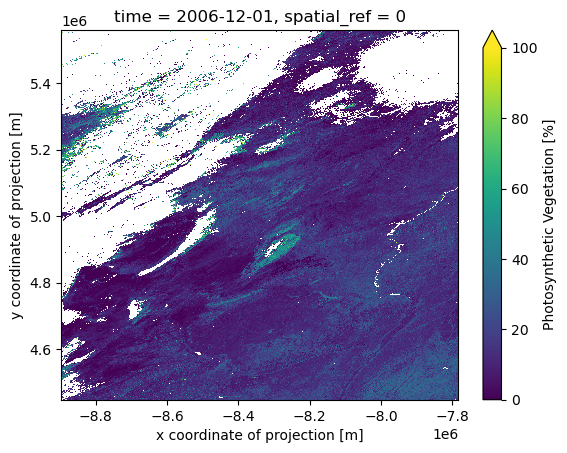

In [ ]:
test_da.plot(vmax=100)
